/Users/ilmoi/Downloads/hw1/hw1/lib/python3.9/site-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/ilmoi/Downloads/hw1/hw1/lib/python3.9/site-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/ilmoi/Downloads/hw1/hw1/lib/python3.9/site-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/ilmoi/Downloads/hw1/hw1/lib/python3.9/site-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/ilmoi/Downloads/hw1/hw1/lib/python3.9/site-packages/s

Training size: 100, Validation Accuracy: 0.7784
Training size: 200, Validation Accuracy: 0.7832
Training size: 500, Validation Accuracy: 0.7868
Training size: 1000, Validation Accuracy: 0.5868
Training size: 2000, Validation Accuracy: 0.7617
Training size: 3336, Validation Accuracy: 0.4599


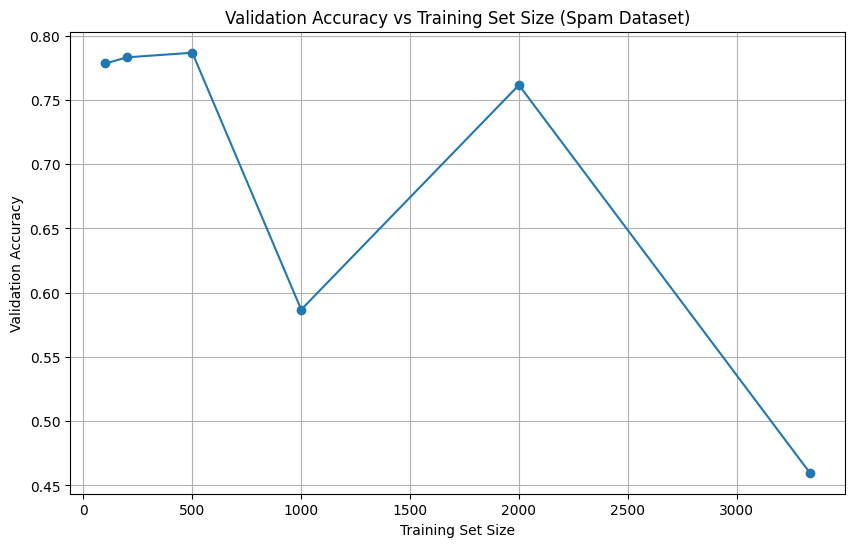

In [1]:
# Load the spam dataset
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Load the data
data = np.load("../data/spam-data.npz")
X = data['training_data']
y = data['training_labels']

# Shuffle the data
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

# Manually split into training and validation sets (80/20 split)
split_index = int(0.8 * X.shape[0])
X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

# Function to calculate classification accuracy
def calculate_accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

# List to store accuracies for each training size
accuracies = []

# Train the model with the following numbers of training examples
training_sizes = [100, 200, 500, 1000, 2000, len(X_train)]
for size in training_sizes:
    # Select a subset of the training data
    X_train_subset = X_train[:size]
    y_train_subset = y_train[:size]
    
    # Check if the subset contains more than one class
    if len(np.unique(y_train_subset)) > 1:
        # Train an SVM model
        model = SVC(kernel='linear', max_iter=1000)
        model.fit(X_train_subset, y_train_subset)
        
        # Validate the model
        y_pred = model.predict(X_val)
        accuracy = calculate_accuracy(y_val, y_pred)
        accuracies.append(accuracy)
        print(f"Training size: {size}, Validation Accuracy: {accuracy:.4f}")
    else:
        print(f"Training size: {size} skipped due to insufficient class diversity.")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(training_sizes[:len(accuracies)], accuracies, marker='o')
plt.title('Validation Accuracy vs Training Set Size (Spam Dataset)')
plt.xlabel('Training Set Size')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()

# TODO: okay this is shitty, for some reason accuracy goes down over time. Something to do with how data is prepared I'm sure.

Kernel: linear, C: 0.01, Training size: 100, Mean Validation Accuracy: 0.6900
Kernel: linear, C: 0.01, Training size: 200, Mean Validation Accuracy: 0.6800
Kernel: linear, C: 0.01, Training size: 500, Mean Validation Accuracy: 0.7300
Kernel: linear, C: 0.01, Training size: 1000, Mean Validation Accuracy: 0.7570
Kernel: linear, C: 0.01, Training size: 2000, Mean Validation Accuracy: 0.7775
Kernel: linear, C: 0.01, Training size: 3336, Mean Validation Accuracy: 0.7815
Kernel: linear, C: 0.1, Training size: 100, Mean Validation Accuracy: 0.7400
Kernel: linear, C: 0.1, Training size: 200, Mean Validation Accuracy: 0.6800
Kernel: linear, C: 0.1, Training size: 500, Mean Validation Accuracy: 0.7500
Kernel: linear, C: 0.1, Training size: 1000, Mean Validation Accuracy: 0.7760
Kernel: linear, C: 0.1, Training size: 2000, Mean Validation Accuracy: 0.8095
Kernel: linear, C: 0.1, Training size: 3336, Mean Validation Accuracy: 0.7186
Kernel: linear, C: 1, Training size: 100, Mean Validation Accura

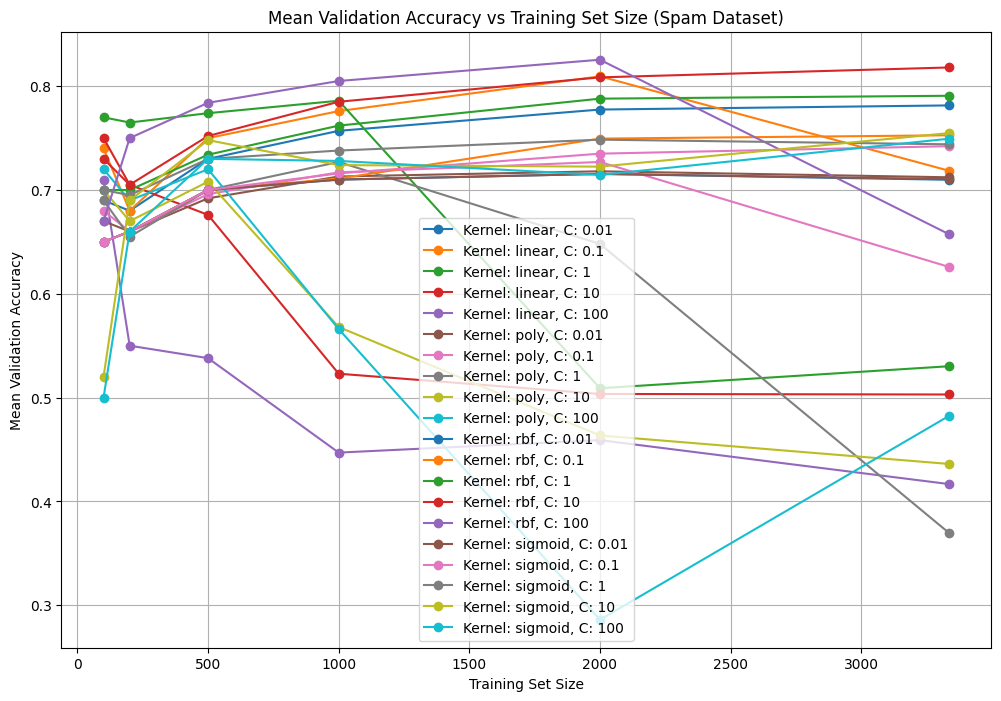

In [2]:
import warnings
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.exceptions import ConvergenceWarning  # Import ConvergenceWarning

# Suppress ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List of kernels to try
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# List of C values to try
C_values = [0.01, 0.1, 1, 10, 100]

# Dictionary to store accuracies for each kernel and C value
kernel_C_accuracies = {kernel: {C: [] for C in C_values} for kernel in kernels}

# Train the model with the following numbers of training examples
training_sizes = [100, 200, 500, 1000, 2000, len(X_train)]
for kernel in kernels:
    for C in C_values:
        for size in training_sizes:
            # Select a subset of the training data
            X_train_subset = X_train[:size]
            y_train_subset = y_train[:size]
            
            # Check if the subset contains more than one class
            if len(np.unique(y_train_subset)) > 1:
                fold_accuracy = []
                
                # Perform K-Fold cross-validation
                for train_index, val_index in kf.split(X_train_subset):
                    X_train_fold, X_val_fold = X_train_subset[train_index], X_train_subset[val_index]
                    y_train_fold, y_val_fold = y_train_subset[train_index], y_train_subset[val_index]
                    
                    # Train an SVM model
                    model = SVC(kernel=kernel, C=C, max_iter=1000)
                    model.fit(X_train_fold, y_train_fold)
                    
                    # Validate the model
                    y_pred_fold = model.predict(X_val_fold)
                    accuracy = accuracy_score(y_val_fold, y_pred_fold)
                    fold_accuracy.append(accuracy)
                
                # Calculate the mean accuracy for the current training size
                mean_accuracy = np.mean(fold_accuracy)
                kernel_C_accuracies[kernel][C].append(mean_accuracy)
                print(f"Kernel: {kernel}, C: {C}, Training size: {size}, Mean Validation Accuracy: {mean_accuracy:.4f}")
            else:
                print(f"Kernel: {kernel}, C: {C}, Training size: {size} skipped due to insufficient class diversity.")

# Plotting the results
plt.figure(figsize=(12, 8))
for kernel in kernels:
    for C in C_values:
        plt.plot(training_sizes[:len(kernel_C_accuracies[kernel][C])], kernel_C_accuracies[kernel][C], marker='o', label=f'Kernel: {kernel}, C: {C}')
plt.title('Mean Validation Accuracy vs Training Set Size (Spam Dataset)')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Validation Accuracy')
plt.grid(True)
plt.legend()
plt.show()

Kernel: rbf, C: 10, Training size: 100, Mean Validation Accuracy: 0.7500
Kernel: rbf, C: 10, Training size: 200, Mean Validation Accuracy: 0.7050


Kernel: rbf, C: 10, Training size: 500, Mean Validation Accuracy: 0.7520
Kernel: rbf, C: 10, Training size: 1000, Mean Validation Accuracy: 0.7850
Kernel: rbf, C: 10, Training size: 2000, Mean Validation Accuracy: 0.8085
Kernel: rbf, C: 10, Training size: 3336, Mean Validation Accuracy: 0.8180


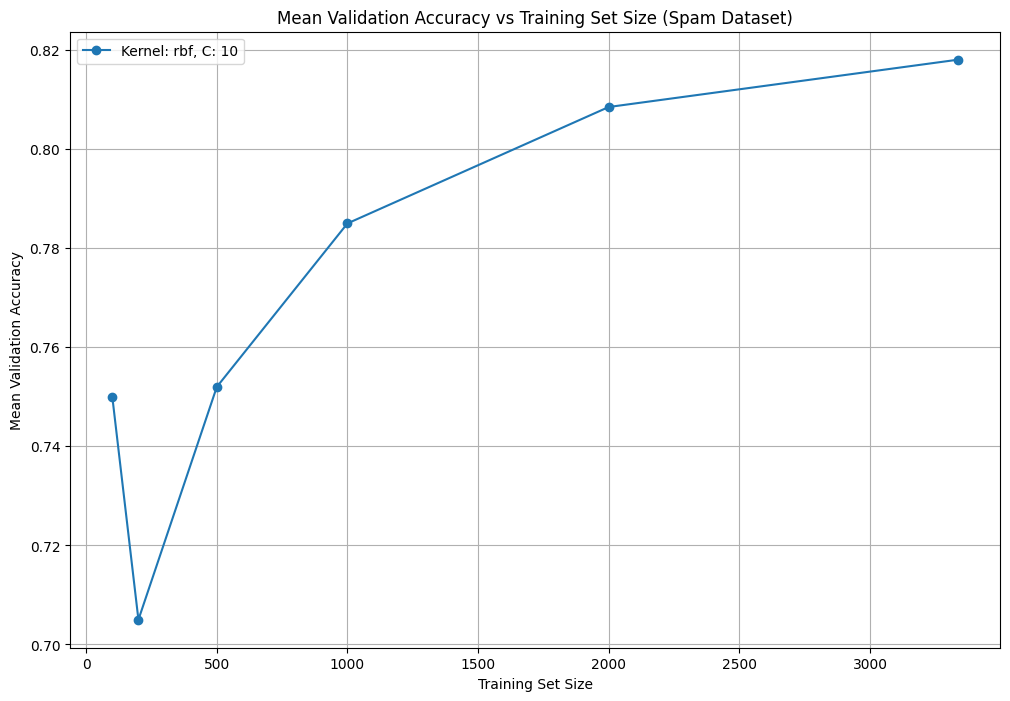

In [3]:
# best run basically

import warnings
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.exceptions import ConvergenceWarning  # Import ConvergenceWarning

# Suppress ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List of kernels to try
kernels = ['rbf']

# List of C values to try
C_values = [10]

# Dictionary to store accuracies for each kernel and C value
kernel_C_accuracies = {kernel: {C: [] for C in C_values} for kernel in kernels}

# Train the model with the following numbers of training examples
training_sizes = [100, 200, 500, 1000, 2000, len(X_train)]
for kernel in kernels:
    for C in C_values:
        for size in training_sizes:
            # Select a subset of the training data
            X_train_subset = X_train[:size]
            y_train_subset = y_train[:size]
            
            # Check if the subset contains more than one class
            if len(np.unique(y_train_subset)) > 1:
                fold_accuracy = []
                
                # Perform K-Fold cross-validation
                for train_index, val_index in kf.split(X_train_subset):
                    X_train_fold, X_val_fold = X_train_subset[train_index], X_train_subset[val_index]
                    y_train_fold, y_val_fold = y_train_subset[train_index], y_train_subset[val_index]
                    
                    # Train an SVM model
                    model = SVC(kernel=kernel, C=C, max_iter=1000)
                    model.fit(X_train_fold, y_train_fold)
                    
                    # Validate the model
                    y_pred_fold = model.predict(X_val_fold)
                    accuracy = accuracy_score(y_val_fold, y_pred_fold)
                    fold_accuracy.append(accuracy)
                
                # Calculate the mean accuracy for the current training size
                mean_accuracy = np.mean(fold_accuracy)
                kernel_C_accuracies[kernel][C].append(mean_accuracy)
                print(f"Kernel: {kernel}, C: {C}, Training size: {size}, Mean Validation Accuracy: {mean_accuracy:.4f}")
            else:
                print(f"Kernel: {kernel}, C: {C}, Training size: {size} skipped due to insufficient class diversity.")

# Plotting the results
plt.figure(figsize=(12, 8))
for kernel in kernels:
    for C in C_values:
        plt.plot(training_sizes[:len(kernel_C_accuracies[kernel][C])], kernel_C_accuracies[kernel][C], marker='o', label=f'Kernel: {kernel}, C: {C}')
plt.title('Mean Validation Accuracy vs Training Set Size (Spam Dataset)')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Validation Accuracy')
plt.grid(True)
plt.legend()
plt.show()

C: 0.001, Validation Accuracy: 0.7605
C: 0.0071968567300115215, Validation Accuracy: 0.7988
C: 0.0517947467923121, Validation Accuracy: 0.4299
C: 0.3727593720314938, Validation Accuracy: 0.3892
C: 2.6826957952797246, Validation Accuracy: 0.4814
C: 19.306977288832496, Validation Accuracy: 0.3305
C: 138.9495494373136, Validation Accuracy: 0.3329
C: 1000.0, Validation Accuracy: 0.2982


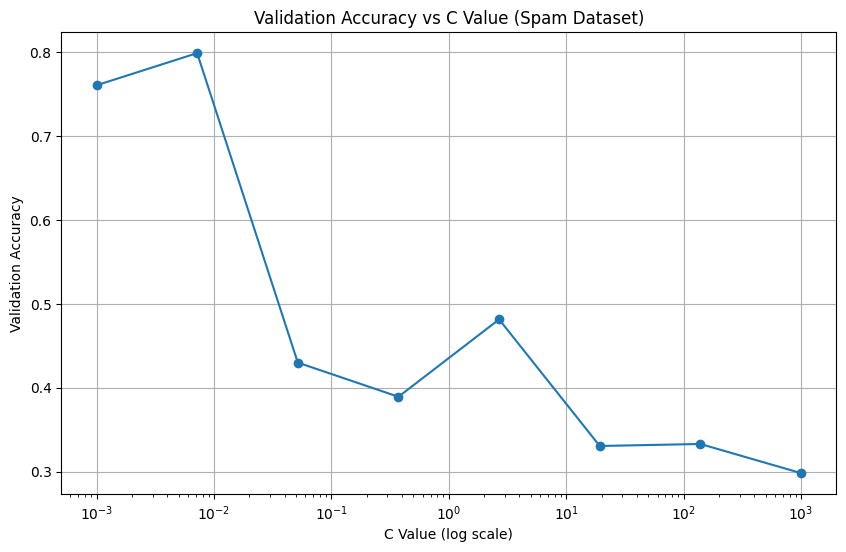

In [4]:
# HYPERPARAMETERS

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Define the range of C values in geometric progression
C_values = np.geomspace(0.001, 1000, num=8)

# Use the largest training size
X_train_subset = X_train
y_train_subset = y_train

# List to store accuracies for each C value
C_accuracies = []

for C in C_values:
    # Train an SVM model with the current C value
    model = SVC(kernel='linear', C=C, max_iter=1000)
    model.fit(X_train_subset, y_train_subset)
    
    # Validate the model
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    C_accuracies.append(accuracy)
    print(f"C: {C}, Validation Accuracy: {accuracy:.4f}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(C_values, C_accuracies, marker='o')
plt.xscale('log')
plt.title('Validation Accuracy vs C Value (Spam Dataset)')
plt.xlabel('C Value (log scale)')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()

In [5]:
# TEST DATASET -> CSV

import pandas as pd
from sklearn.svm import SVC
import numpy as np

# Load the spam dataset
data = np.load("../data/spam-data.npz")
X_train = data['training_data']
y_train = data['training_labels']
X_test = data['test_data']

# Shuffle the data
indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)
X_train = X_train[indices]
y_train = y_train[indices]

X_train_subset = X_train
y_train_subset = y_train

# Check if the subset contains more than one class
if len(np.unique(y_train_subset)) > 1:
    # Train the SVM model
    model = SVC(kernel='rbf', C=10, max_iter=1000)
    model.fit(X_train_subset, y_train_subset)

    # Predict on the test dataset
    y_test_pred = model.predict(X_test)

    # Prepare the submission DataFrame
    submission_df = pd.DataFrame({
        'Id': np.arange(1, len(y_test_pred) + 1),
        'Category': y_test_pred.astype(int)  # Ensure integer labels
    })

    # Save to CSV
    submission_df.to_csv('spam_submission.csv', index=False, header=True)
else:
    print("The training subset does not contain more than one class.")